Best ARMA Order: (1, 0, 1) with AIC: 3063.6498443558553
                               SARIMAX Results                                
Dep. Variable:                    HYB   No. Observations:                  292
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1527.825
Date:                Sun, 06 Oct 2024   AIC                           3063.650
Time:                        19:30:59   BIC                           3078.357
Sample:                             0   HQIC                          3069.541
                                - 292                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4446      6.687      1.412      0.158      -3.661      22.551
ar.L1          0.8980      0.111      8.066      0.000       0.680       1.

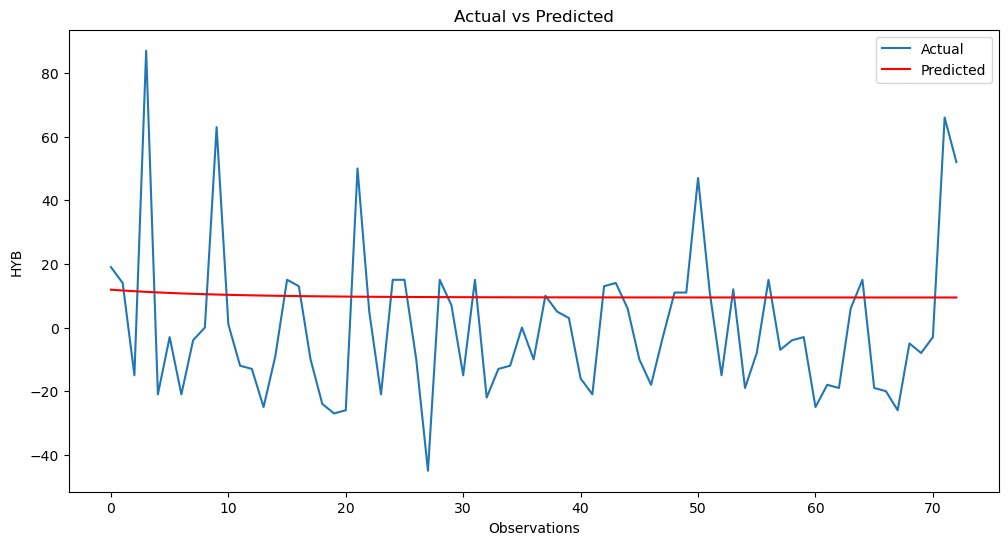

Mean Squared Error (MSE): 629.7526222548004
Root Mean Squared Error (RMSE): 25.094872429538277
R-squared (R²): -0.16740774841369088
Mean Absolute Percentage Error (MAPE): inf%


In [7]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import itertools
import warnings

warnings.filterwarnings("ignore")

# Load your data
data = pd.read_csv('new_data2.csv')

data = data.drop(['date(dd/mm/yy)'], axis=1)

# Handle missing values
data.fillna(data.mean(), inplace=True)

# Define the target variable
target = 'HYB'  # Replace with your actual target variable

# Train-test split
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Function to evaluate ARMA model using AIC
def evaluate_arma_model(data, arima_order):
    try:
        model = ARIMA(data[target], order=arima_order)
        model_fit = model.fit()
        aic = model_fit.aic
        return aic
    except:
        return float("inf")

# Grid search for p and q parameters
p = q = range(0, 3)  # AR and MA orders
orders = list(itertools.product(p, [0], q))  # (p,0,q) for ARMA model

best_aic = float("inf")
best_order = None

for order in orders:
    aic = evaluate_arma_model(train, order)
    if aic < best_aic:
        best_aic = aic
        best_order = order

# Display the best parameters
print(f'Best ARMA Order: {best_order} with AIC: {best_aic}')

# Fit the ARMA model with the best parameters
model = ARIMA(train[target], order=best_order)
model_fit = model.fit()

# Model summary
print(model_fit.summary())

# Predictions
predictions = model_fit.forecast(steps=len(test))

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test[target].values, label='Actual')
plt.plot(predictions.values, label='Predicted', color='red')
plt.title('Actual vs Predicted')
plt.xlabel('Observations')
plt.ylabel(target)
plt.legend()
plt.show()

# Evaluation metrics
mse = mean_squared_error(test[target], predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test[target], predictions)
mape = np.mean(np.abs((test[target] - predictions) / test[target])) * 100

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')
